In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (12, 8)
plt.style.use('seaborn-dark')

In [2]:
train = pd.read_csv("train.csv", parse_dates=[0])
test = pd.read_csv("test.csv", parse_dates=[0])

In [3]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["week_day"] = train["datetime"].dt.day_of_week
train["hour"] = train["datetime"].dt.hour
train["week_of_year"] = train["datetime"].dt.weekofyear

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["week_day"] = test["datetime"].dt.day_of_week
test["hour"] = test["datetime"].dt.hour
test["week_of_year"] = test["datetime"].dt.weekofyear

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,week_day,hour,week_of_year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,0,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,2,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,3,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,4,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,19,51
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,20,51
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,21,51
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,2,22,51


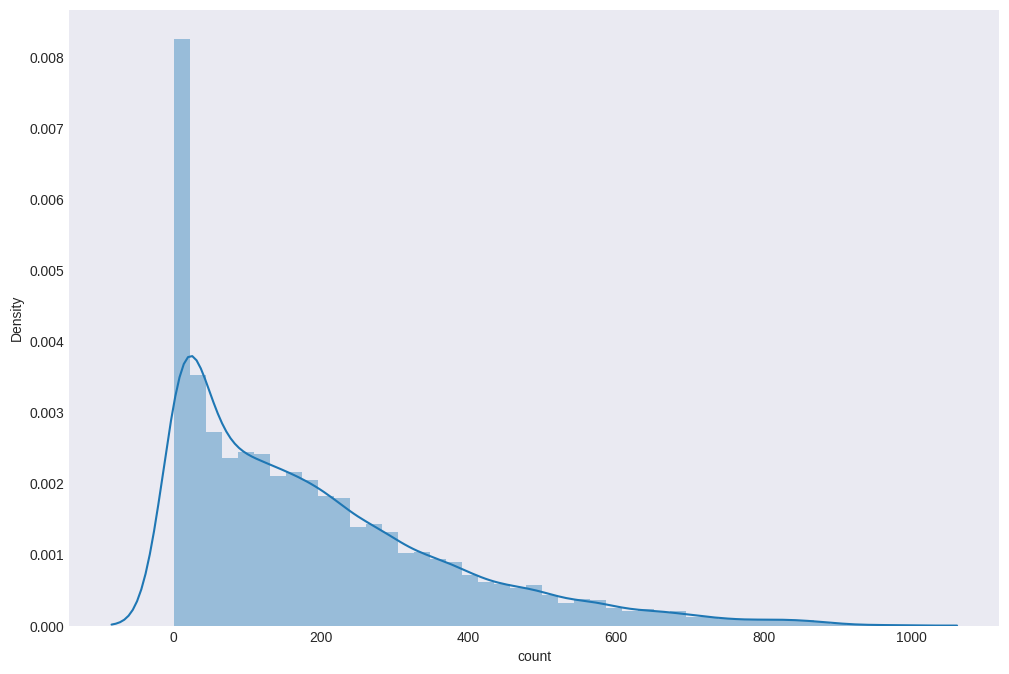

In [5]:
#Check the distribution of the rented bikes
sns.distplot(train["count"]);

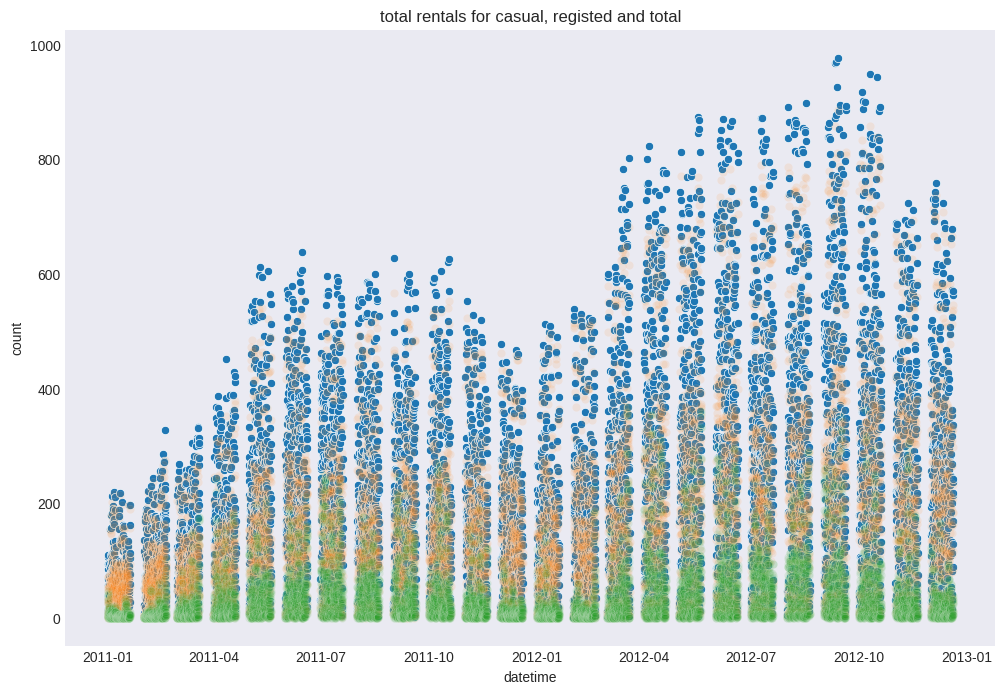

In [6]:
sns.scatterplot(data=train, y="count", x="datetime")

sns.scatterplot(data=train, y="registered", x="datetime", alpha=0.1)

sns.scatterplot(data=train, y="casual", x="datetime", alpha=0.1)

plt.title("total rentals for casual, registed and total");


In [7]:
train.drop(columns=["datetime"], axis=1, inplace=True)

test.drop(columns=["datetime"], axis=1, inplace=True)

['temp', 'atemp', 'humidity', 'windspeed']


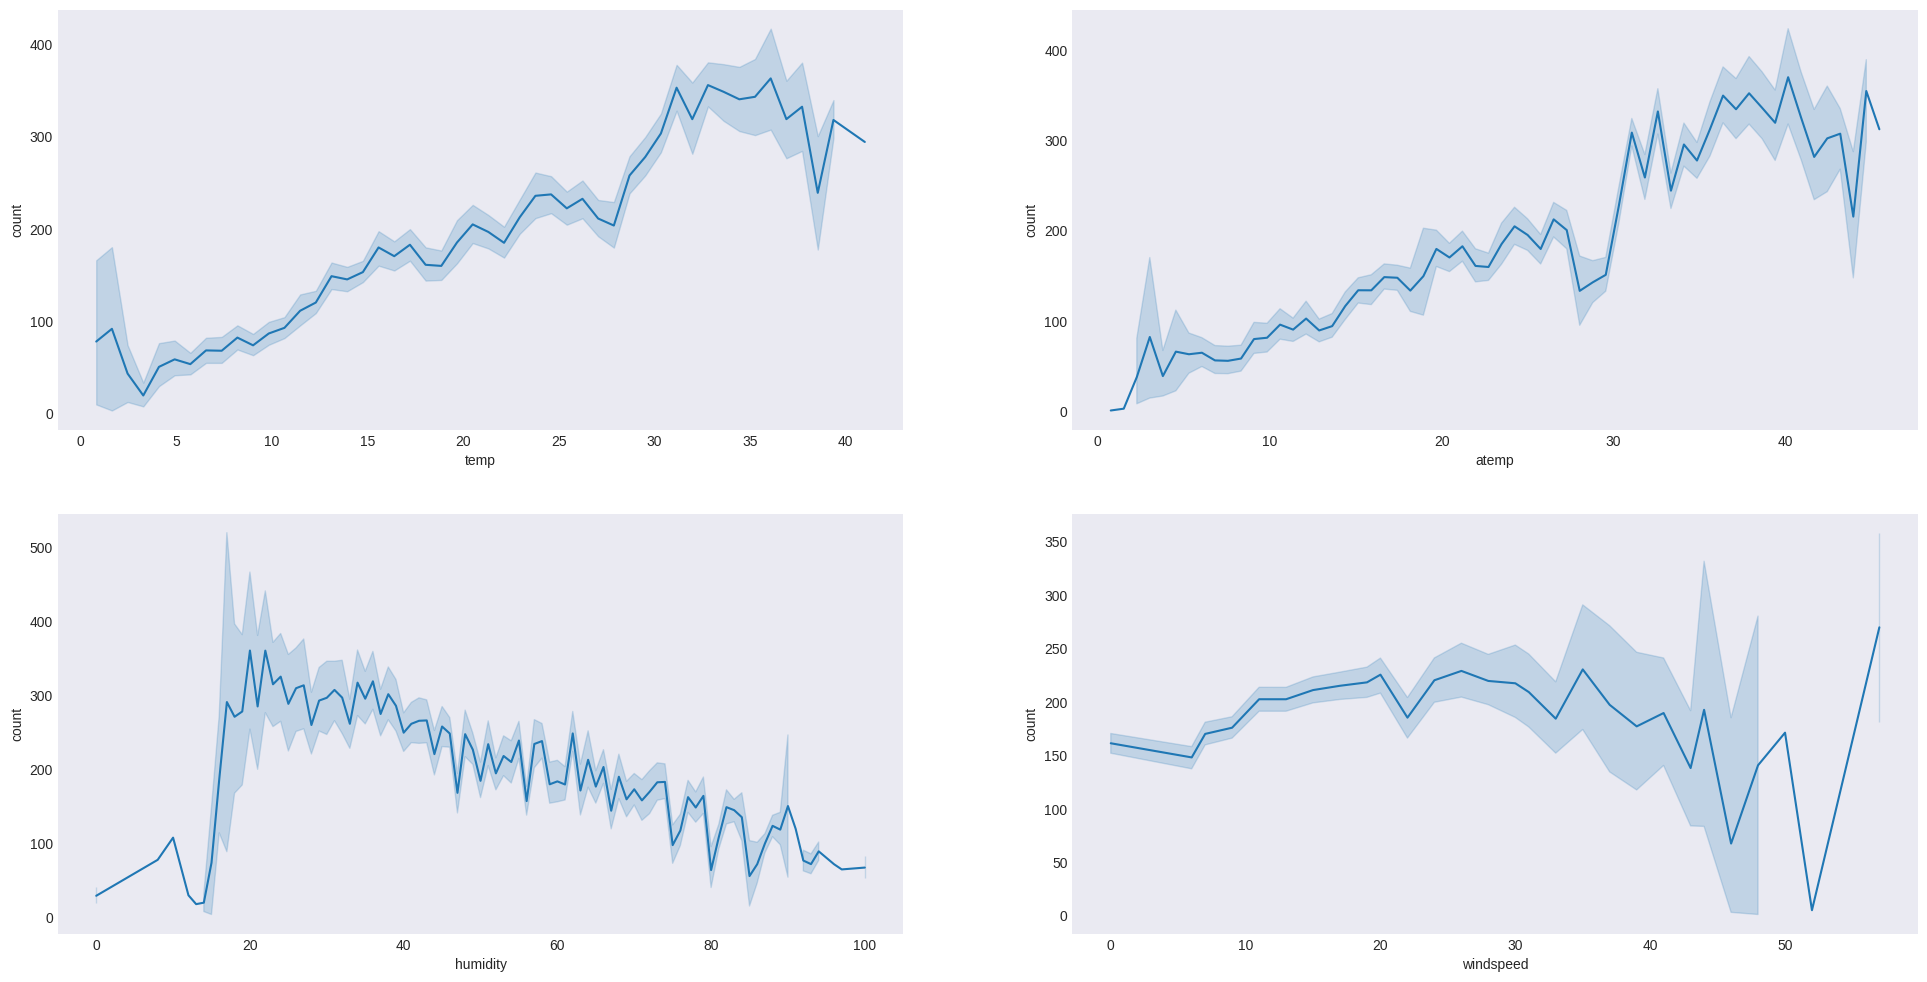

In [8]:
numerical=[f for f in train]
numerical=numerical[4:8]
print (numerical)

fig=plt.figure(figsize=(24,12))


for i, f in enumerate(numerical):
    ax=fig.add_subplot(2,2, i+1)
    sns.lineplot(train[f], train["count"])
plt.show()

['temp', 'atemp', 'humidity', 'windspeed']


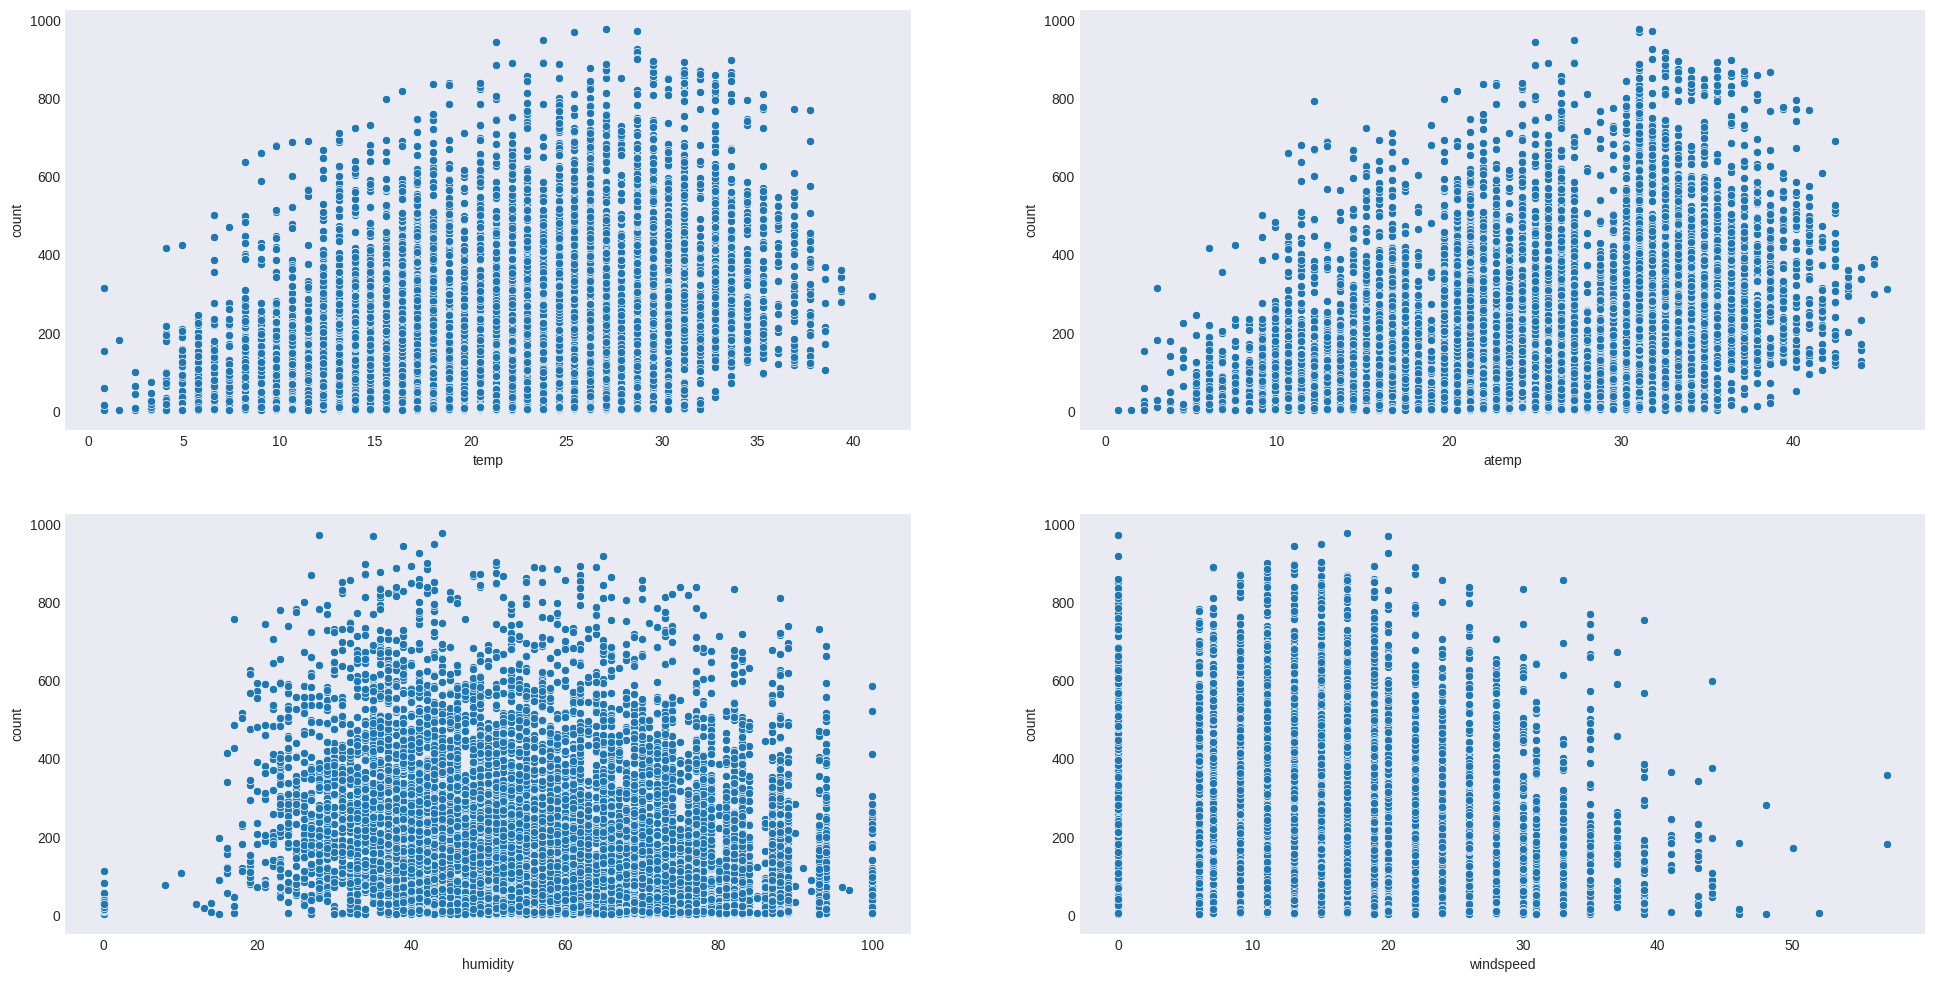

In [9]:
numerical=[f for f in train]
numerical=numerical[4:8]
print (numerical)

fig=plt.figure(figsize=(24,12))


for i, f in enumerate(numerical):
    ax=fig.add_subplot(2,2, i+1)
    sns.scatterplot(train[f], train["count"])
plt.show()

['season', 'holiday', 'workingday', 'weather']


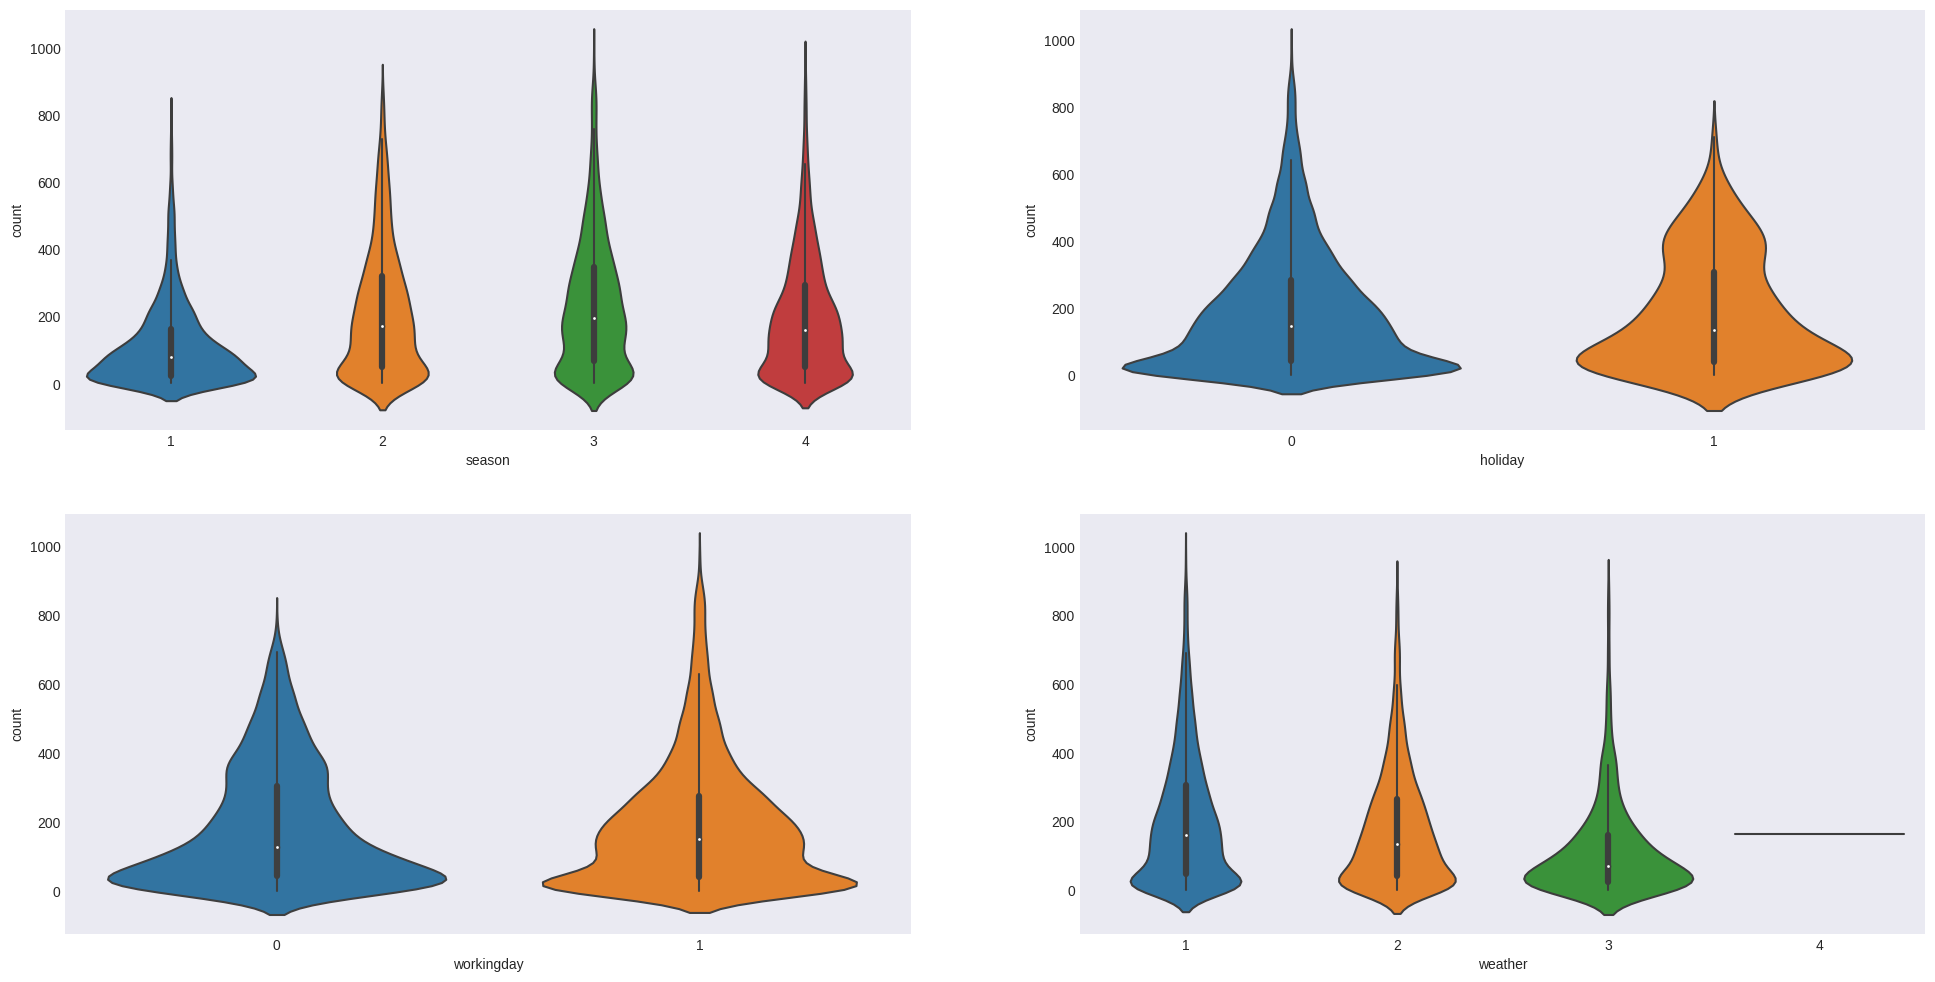

In [10]:
categorical=[f for f in train]
categorical=categorical[0:4]
print (categorical)

fig=plt.figure(figsize=(24,12))

for i, f in enumerate(categorical):
    ax=fig.add_subplot(2,2, i+1)
    sns.violinplot(train[f], train["count"])
plt.show()



['year', 'month', 'day', 'week_day', 'hour', 'week_of_year']


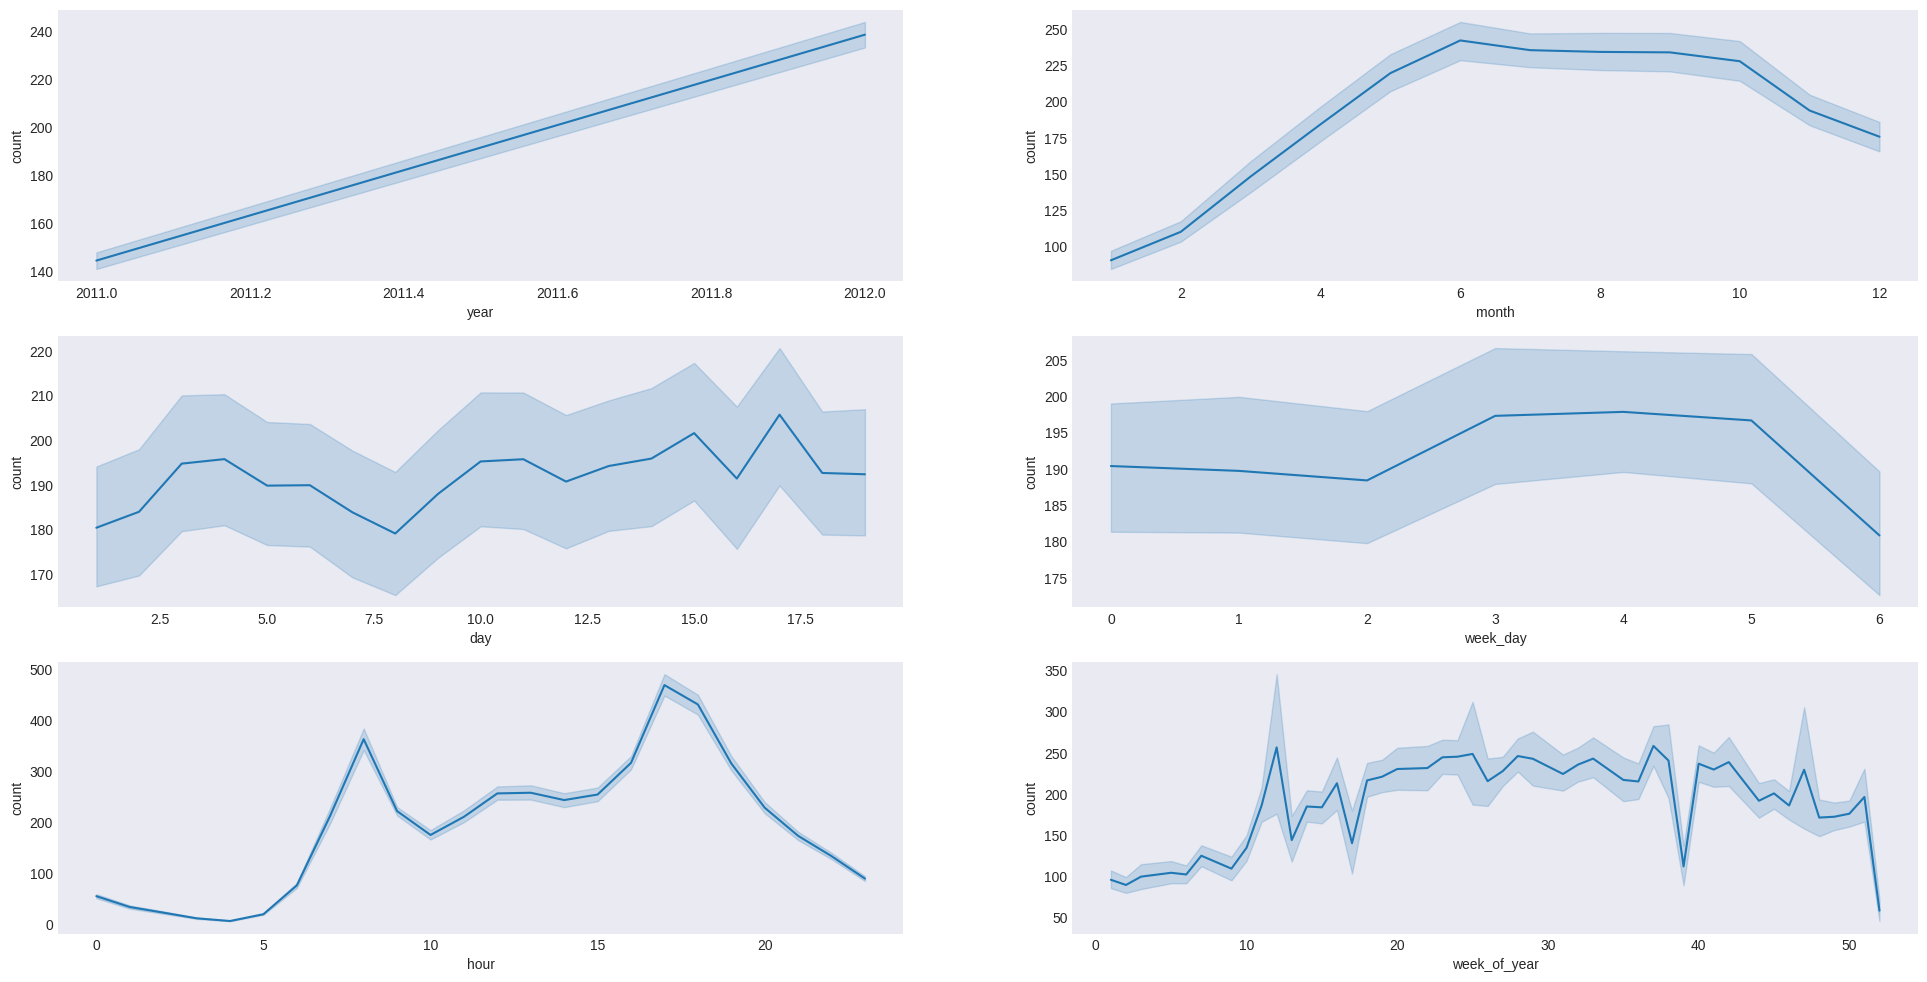

In [11]:
time = [f for f in train]
time= time[-6:]
print (time)

fig=plt.figure(figsize=(24,12))

for i, f in enumerate(time):
    ax=fig.add_subplot(3,2, i+1)
    sns.lineplot(train[f], train["count"]);

In [12]:
categorical, numerical, time

(['season', 'holiday', 'workingday', 'weather'],
 ['temp', 'atemp', 'humidity', 'windspeed'],
 ['year', 'month', 'day', 'week_day', 'hour', 'week_of_year'])

<AxesSubplot:>

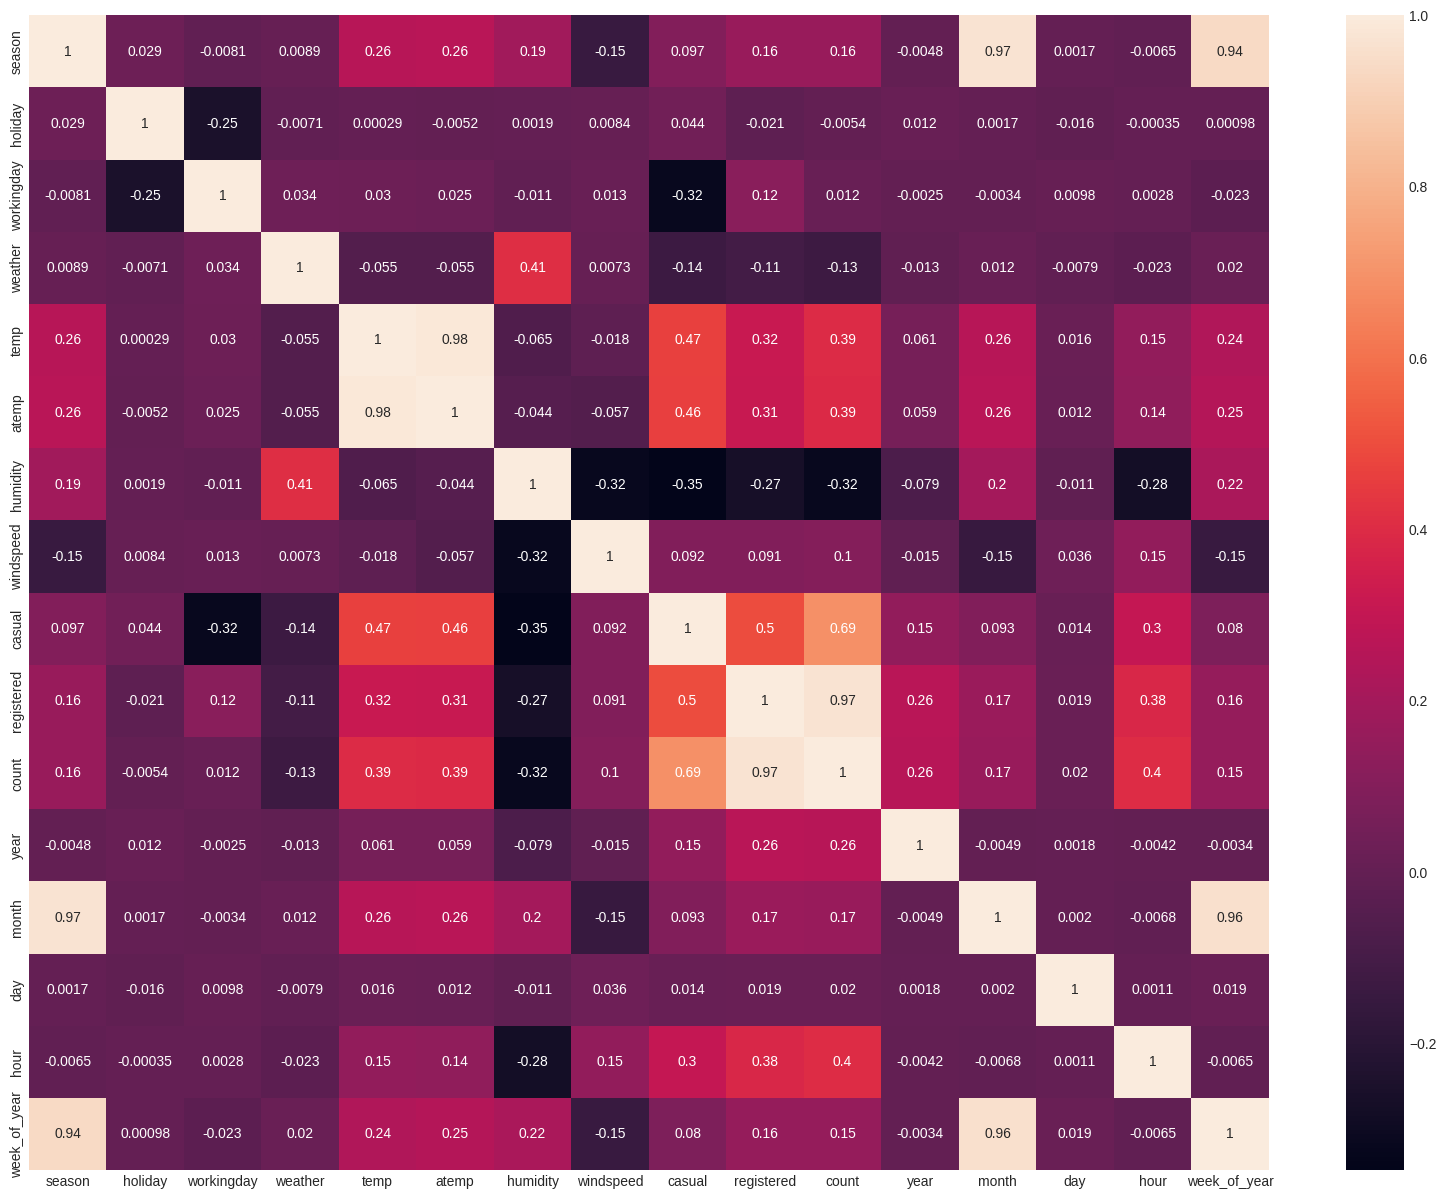

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(train.drop("week_day", axis=1).corr(), annot=True)

<AxesSubplot:>

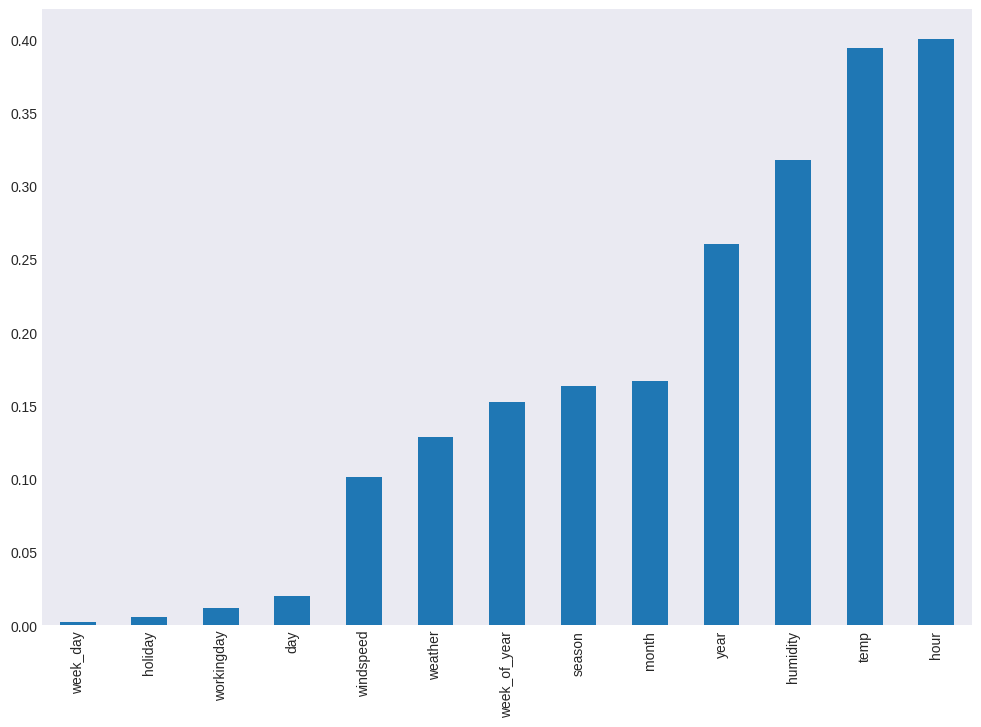

In [14]:
corr = train.corr().drop(["casual", "atemp", "registered", "count"])
corr["count"].abs().sort_values().plot(kind="bar")

In [15]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'week_day', 'hour', 'week_of_year'],
      dtype='object')

In [16]:
train.drop(["atemp", "casual", "registered"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'week_day', 'hour', 'week_of_year']


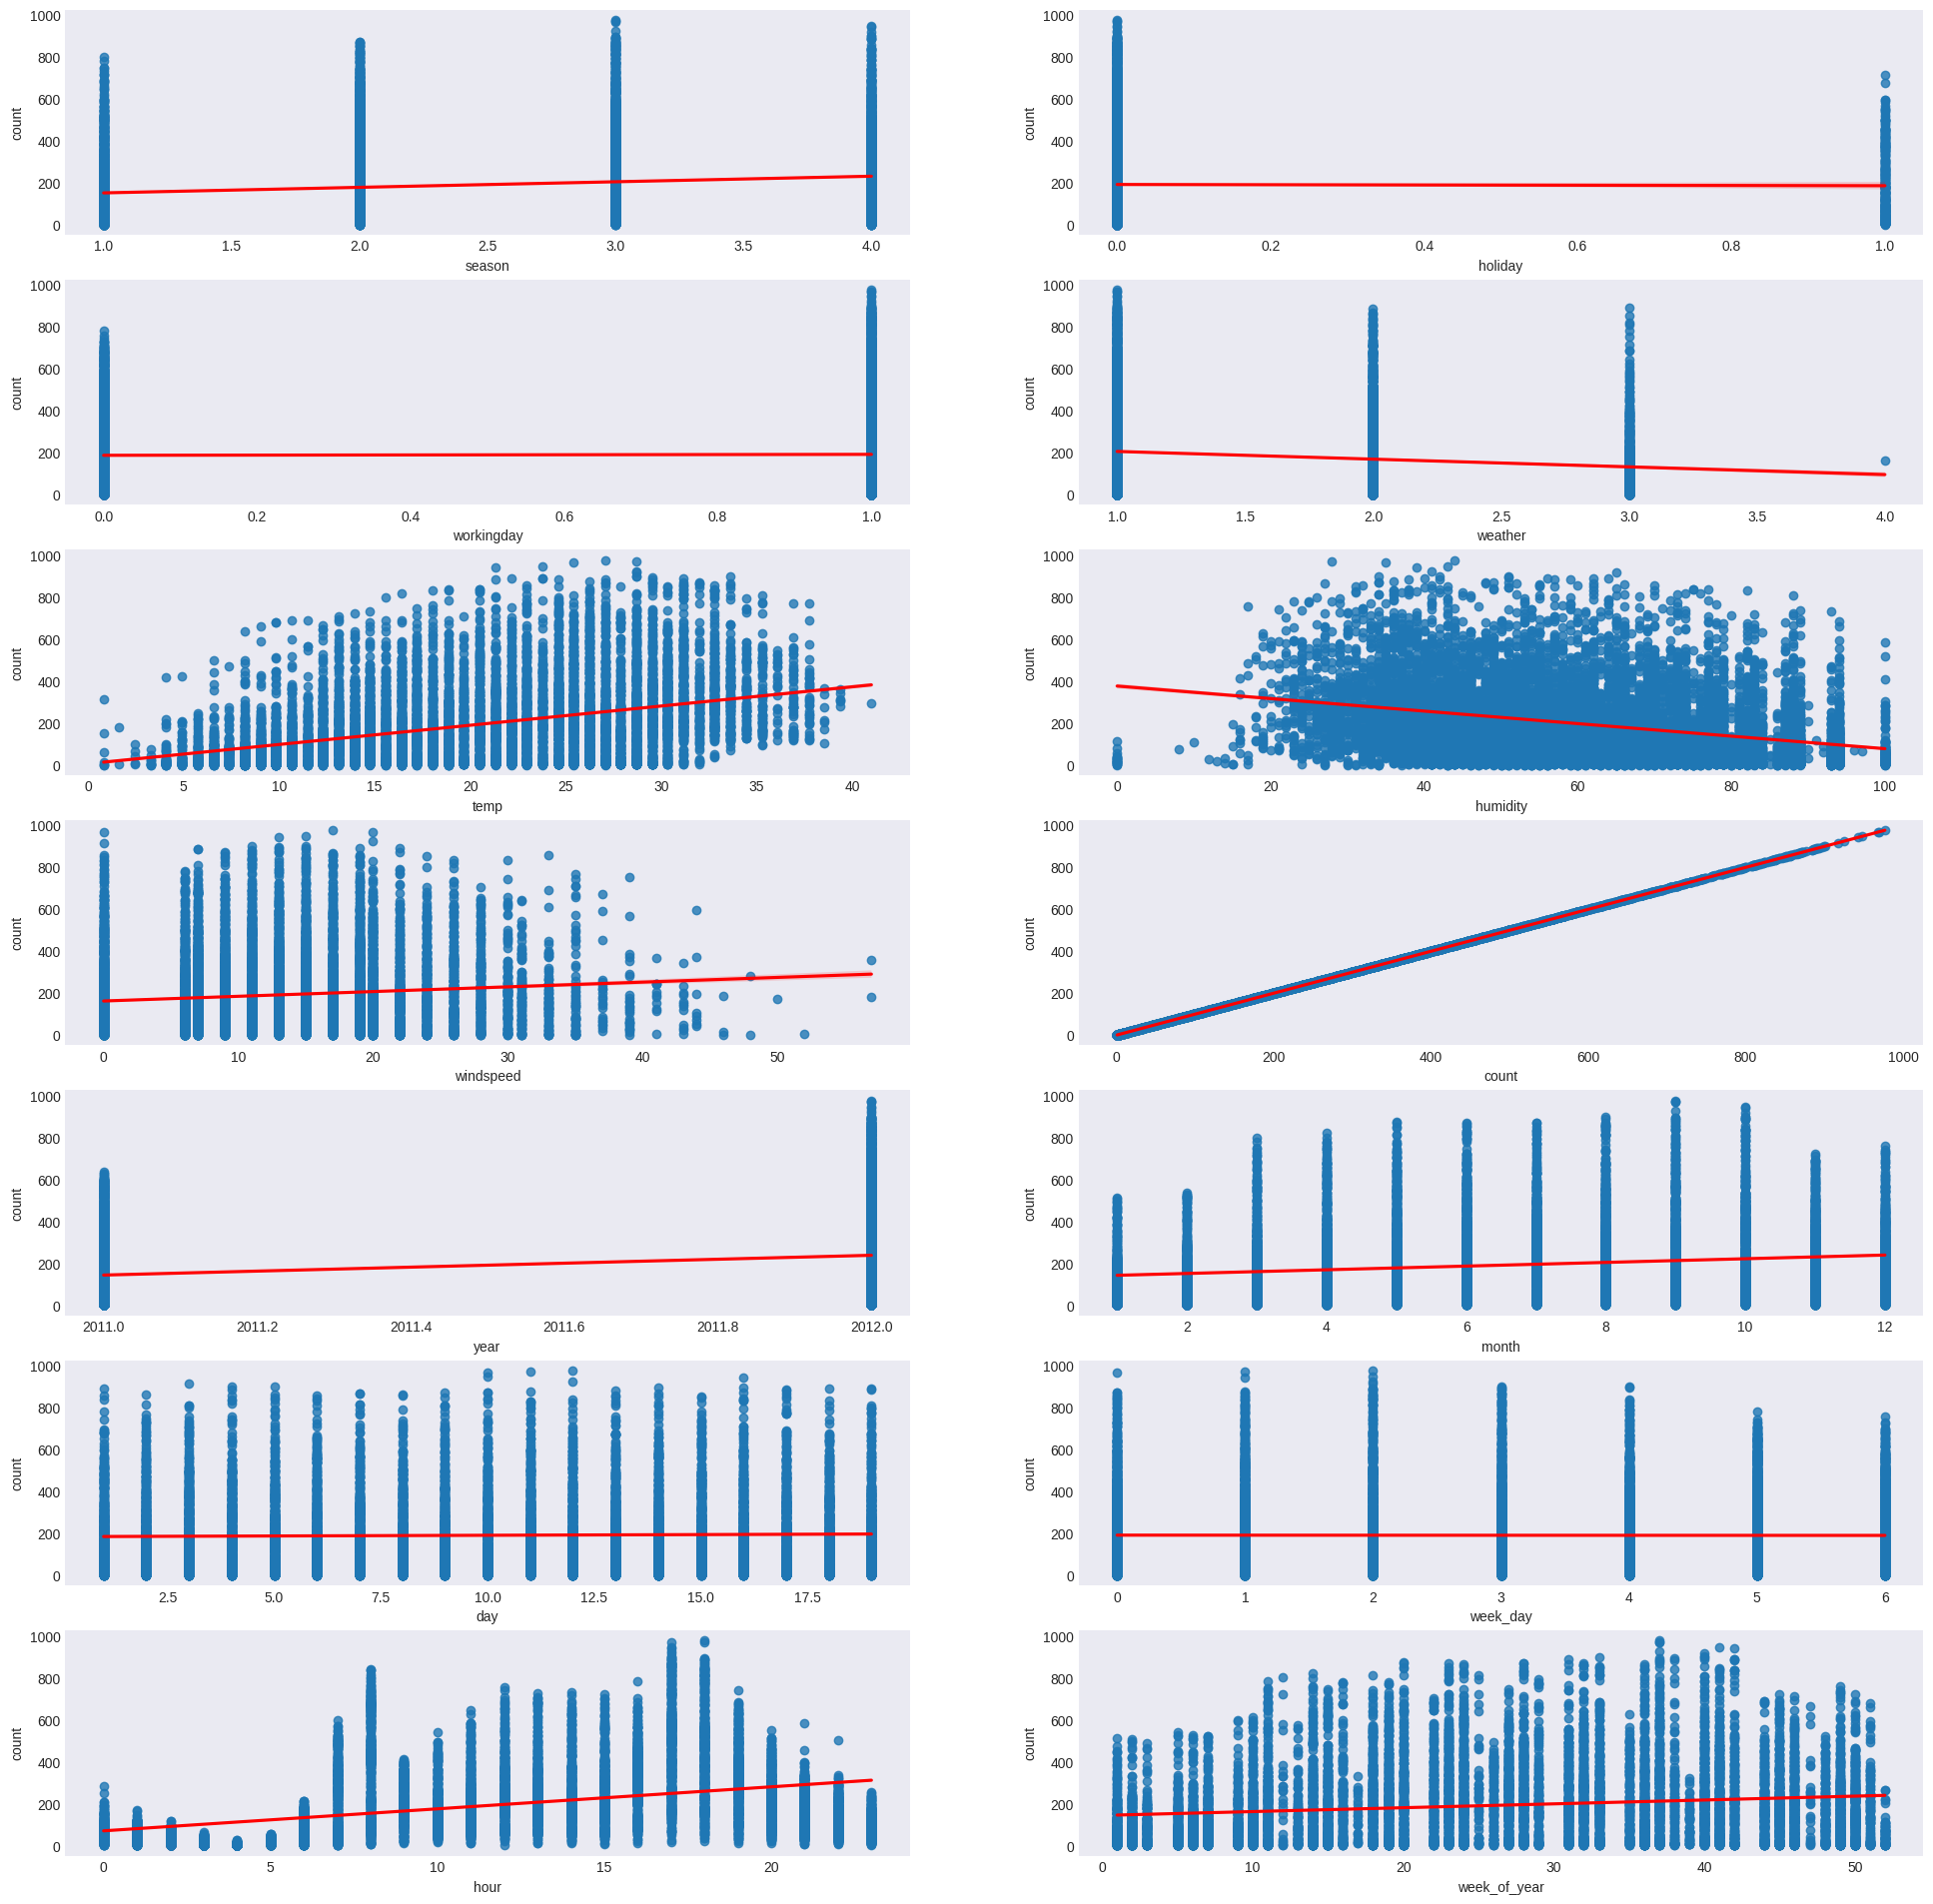

In [17]:
features = [f for f in train]
features= features[:]
print (features)

fig=plt.figure(figsize=(24,24))

for i, f in enumerate(features):
    ax=fig.add_subplot(7,2, i+1)
    sns.regplot(train[f], train["count"], line_kws={"color": "red"});